# Tratamento de dados

### Bibliotecas utilizadas

In [1]:
%pip install pm4py==2.7.11.13 -q
%pip install pandas==2.2.2 -q

import pm4py
import pandas as pd

from pm4py.objects.log.obj import EventLog

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Logs recebidos

In [2]:
# Log 3
L3 = []
L3.extend(['ABCDEFBCDEFBDCEG' for _ in range(1)])
L3.extend(['ABDCEG' for _ in range(2)])
L3.extend(['ABCDEFBCDEFBDCEG' for _ in range(1)])

# Log 4
L4 = []
L4.extend(['ACD' for _ in range(45)])
L4.extend(['BCD' for _ in range(42)])
L4.extend(['ACE' for _ in range(38)])
L4.extend(['BCE' for _ in range(22)])


# Log 5
L5 = []
L5.extend(['ABEF' for _ in range(2)])
L5.extend(['ABECDBF' for _ in range(3)]) 
L5.extend(['ABCEDBF' for _ in range(2)])
L5.extend(['ABCDEBF' for _ in range(4)])
L5.extend(['AEBCDBF' for _ in range(3)])

### Tratamento dos logs para PM4PY

In [3]:

def treat_logs(data: list[str], start_case_id: int = 1) -> EventLog:
    
    rows = []
    case_id = start_case_id
    
    # Trata traces como cases e expande caracteres do trace como eventos
    for events in data:
        for event in events:
            rows.append([case_id, event, pd.to_datetime('2024-01-01')])
        case_id += 1

    # Transforma em um DataFrame
    df = pd.DataFrame(rows, columns=['case_id', 'activity', 'timestamp'])
    
    # Garante que o Case seja textual
    df['case_id'] = df['case_id'].astype(str)

    # Formata no formato para PM4PY
    df = pm4py.format_dataframe(df, 
                                case_id='case_id', 
                                activity_key='activity', 
                                timestamp_key='timestamp', 
                                timest_format='yyyy-mm-dd'
                                )

    # Converte em um objeto EventLog
    log = pm4py.convert_to_event_log(df, 'case_id')

    return log



In [4]:

df_L3 = treat_logs(L3, start_case_id=1)
df_L4 = treat_logs(L4, start_case_id=len(L3) + 1)
df_L5 = treat_logs(L5, start_case_id=len(L3) + len(L4) + 1)


# Questões

### 1) Construa as redes causais, incluindo relação de dependência e descoberta das estruturas splits e joins

#### L3

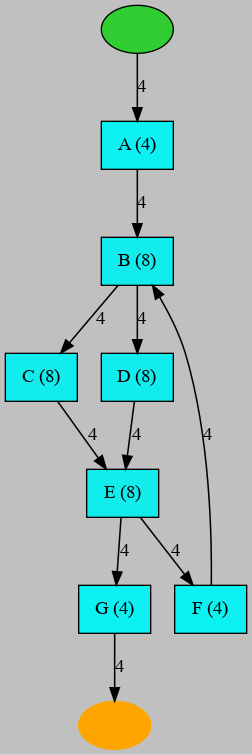

In [5]:

hm3 = pm4py.discover_heuristics_net(df_L3, dependency_threshold=0.8)
pm4py.view_heuristics_net(hm3, bgcolor='gray')


#### L4

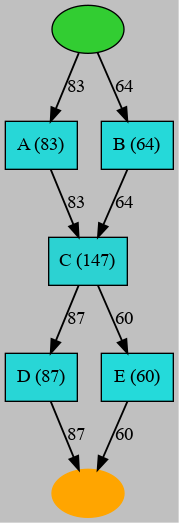

In [6]:

hm4 = pm4py.discover_heuristics_net(df_L4, dependency_threshold=0.8)
pm4py.view_heuristics_net(hm4, bgcolor='gray')


#### L5

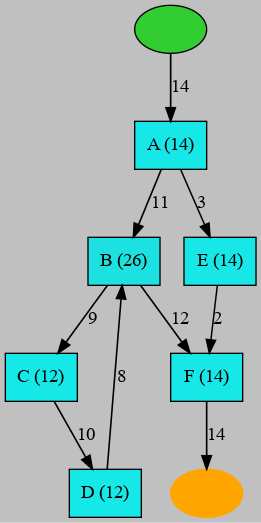

In [7]:

hm5 = pm4py.discover_heuristics_net(df_L5, dependency_threshold=0.3)
pm4py.view_heuristics_net(hm5, bgcolor='gray')


## 2) Construa as árvores de processos e as respectivas redes de Petri.

### Log 3

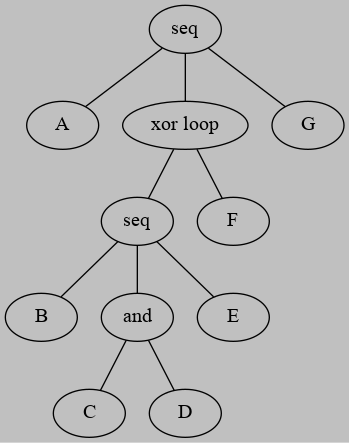

In [8]:

# Arvore de processo
treeL3 = pm4py.discover_process_tree_inductive(df_L3)
pm4py.view_process_tree(treeL3, rankdir='TB', bgcolor='gray')


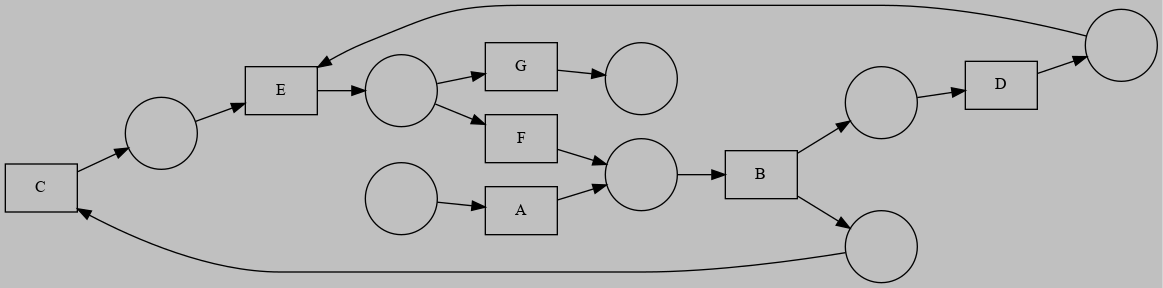

In [9]:

# Rede de Petri
petriL3 = pm4py.convert_to_petri_net(treeL3)
pm4py.view_petri_net(petriL3[0], bgcolor='gray')


### Log 4

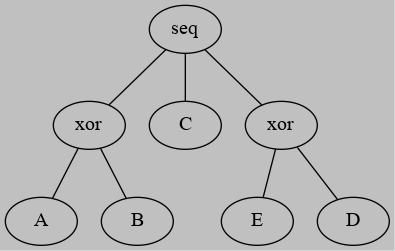

In [10]:

# Arvore de processo
treeL4 = pm4py.discover_process_tree_inductive(df_L4)
pm4py.view_process_tree(treeL4, rankdir='TB', bgcolor='gray')


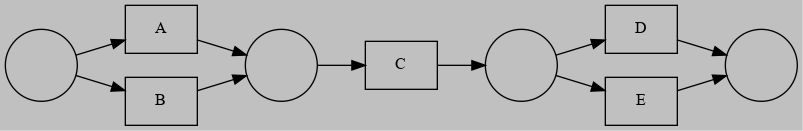

In [11]:

# Rede de Petri
petriL4 = pm4py.convert_to_petri_net(treeL4)
pm4py.view_petri_net(petriL4[0], bgcolor='gray')


### Log 5

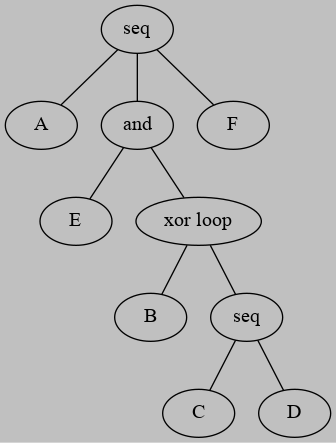

In [12]:

# Arvore de processo
treeL5 = pm4py.discover_process_tree_inductive(df_L5)
pm4py.view_process_tree(treeL5, rankdir='TB', bgcolor='gray')


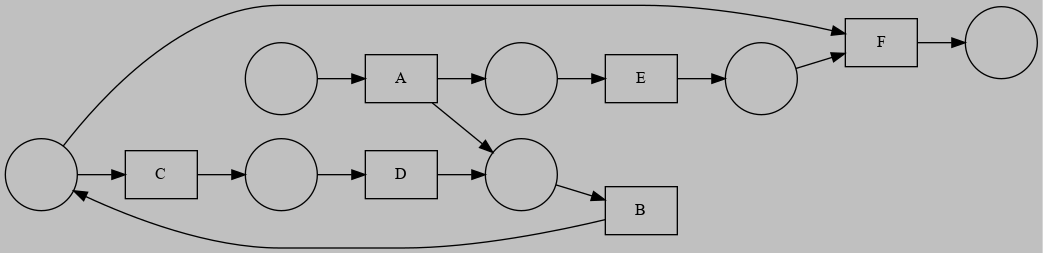

In [13]:
# Rede de Petri
petriL5 = pm4py.convert_to_petri_net(treeL5)
pm4py.view_petri_net(petriL5[0], bgcolor='gray')
